In [1]:
import os
os.chdir("..") # Change wd to root for easy dev

In [11]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from bwypy import Bwypy
from bwypy import QueryBuilder, AND, OR
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
import bwypy
%reload_ext bwypy

In [21]:
# Set logging
import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)

In [22]:
endpoint = "https://bookworm.htrc.illinois.edu/cgi-bin/dbbindings.py"
database = "hathipd"
bw = bwypy.Bwypy(endpoint=endpoint, db=database)

In [23]:
import requests
r = request

NameError: name 'request' is not defined

In [27]:
# Set up Query Builder
fieldl = bw.fields["dbname"].tolist()
qb = QueryBuilder(fieldl)
query = qb.search_limits(qb.date_year > 0).groups(qb.date_year, qb.lc_classes).query
query

{'groups': ['date_year', 'lc_classes'],
 'search_limits': [{'date_year': {'$gt': 0}}]}

In [28]:
# Get languages stats
q = bw.default.copy()
q.update(query)
print(q)
a = bw.search(q)
a.sort("TextCount", ascending=False).head()

{'groups': ['date_year', 'lc_classes'], 'compare_limits': [], 'counttype': ['TextCount', 'WordCount'], 'database': 'hathipd', 'words_collation': 'Case_Sensitive', 'search_limits': [{'date_year': {'$gt': 0}}], 'method': 'return_json'}
https://bookworm.htrc.illinois.edu/cgi-bin/dbbindings.py?queryTerms={"groups": ["date_year", "lc_classes"], "compare_limits": [], "counttype": ["TextCount", "WordCount"], "database": "hathipd", "words_collation": "Case_Sensitive", "search_limits": [{"date_year": {"$gt": 0}}], "method": "return_json"}


C:\Users\organis2\AppData\Local\Continuum\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py:821: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.org/en/latest/security.html
  InsecureRequestWarning)
C:\Users\organis2\Dropbox\Work\HTRC\bookworm\BookwormPython\bwypy\bwypy.py:70: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  
C:\Users\organis2\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,,TextCount,WordCount
date_year,lc_classes,,
1900.0,unknown,62016.0,6.939937e+09
1800.0,unknown,34635.0,7.158135e+09
1000.0,unknown,30773.0,7.025088e+09
1906.0,unknown,28270.0,3.642358e+09
1907.0,unknown,27505.0,3.312150e+09


In [29]:
b = a.reset_index()
b["pre-1923"] = b["date_year"] < 1923
c = b[["pre-1923", "lc_classes", "TextCount"]].groupby(["pre-1923", "lc_classes"]).sum()
c

TextCount
pre-1923 lc_classes                                                   
False    Agriculture                                           24628.0
         Auxiliary Sciences of History                          5047.0
         Bibliography, Library Science, and General Info...    16485.0
         Education                                             11223.0
         Fine Arts                                              4055.0
         General Works                                          1576.0
         General and Old World History                         10207.0
         Geography, Anthropology, and Recreation                8639.0
         History of America                                     8118.0
         History of the United States and British, Dutch...     6662.0
         Language and Literature                               11542.0
         Law                                                   35533.0
         Medicine                                              13302.0
         Military Science                                       9306.0
         Music                                                  2878.0
         Naval Science                                          3668.0
         Philosophy, Psychology, and Religion                   6650.0
         Political Science                                     15324.0
         Science                                               26991.0
         Social Sciences                                       75214.0
         Technology                                            40524.0
         unknown                                              288936.0
True     Agriculture                                           57866.0
         Auxiliary Sciences of History                         20874.0
         Bibliography, Library Science, and General Info...    39446.0
         Education                                             47721.0
         Fine Arts                                             38006.0
         General Works                                        106939.0
         General and Old World History                        234785.0
         Geography, Anthropology, and Recreation               29972.0
         History of America                                    68063.0
         History of the United States and British, Dutch...    98823.0
         Language and Literature                              373533.0
         Law                                                   91201.0
         Medicine                                              41417.0
         Military Science                                      12096.0
         Music                                                 33735.0
         Naval Science                                          6259.0
         Philosophy, Psychology, and Religion                 156295.0
         Political Science                                     66252.0
         Science                                              157460.0
         Social Sciences                                      137766.0
         Technology                                            80441.0
         unknown                                             1999869.0

C:\Users\organis2\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()
C:\Users\organis2\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


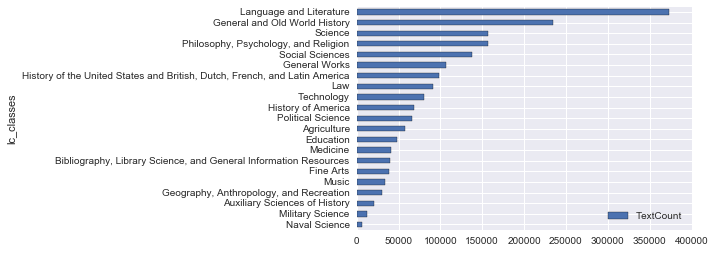

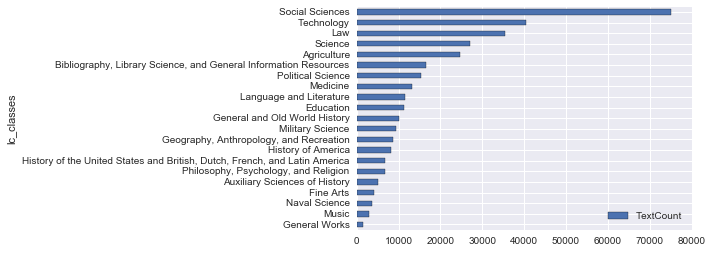

In [30]:
c = c.reset_index()
c = c[c.lc_classes != "unknown"]
c[c["pre-1923"]==True][["lc_classes", "TextCount"]].sort("TextCount").plot(kind="barh", x="lc_classes", y="TextCount")
c[c["pre-1923"]==False][["lc_classes", "TextCount"]].sort("TextCount").plot(kind="barh", x="lc_classes", y="TextCount")

In [41]:
#plt.figure()
from plotSlope import slope
%reload_ext plotSlope

In [42]:
d = c.reset_index()\
     .pivot(index="lc_classes", columns="pre-1923", values="TextCount")\
     .reindex_axis([True, False], axis=1)
d.columns = ["pre-1923", "1923-"]
e = 100* d / d.apply(lambda x: x.sum())
e['difference'] = e['1923-'] - e['pre-1923']
pd.options.display.float_format = '{:,.2f}%'.format
e.sort("pre-1923", ascending=False).head()

C:\Users\organis2\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,pre-1923,1923-,difference
lc_classes,,,
Language and Literature,19.67%,3.42%,-16.25%
General and Old World History,12.36%,3.02%,-9.34%
Science,8.29%,8.00%,-0.30%
"Philosophy, Psychology, and Religion",8.23%,1.97%,-6.26%
Social Sciences,7.25%,22.28%,15.03%


In [43]:
long_pd = pd.melt(e.reset_index()[['lc_classes', 'pre-1923', '1923-']],
                 id_vars=['lc_classes'], var_name='Time Period')
long_pd["Time Period"] = long_pd["Time Period"].astype('category')
long_pd.head()

,lc_classes,Time Period,value
0,Agriculture,pre-1923,3.05%
1,Auxiliary Sciences of History,pre-1923,1.10%
2,"Bibliography, Library Science, and General Inf...",pre-1923,2.08%
3,Education,pre-1923,2.51%
4,Fine Arts,pre-1923,2.00%


In [34]:
long_pd.dtypes

lc_classes       object
Time Period    category
value           float64
dtype: object

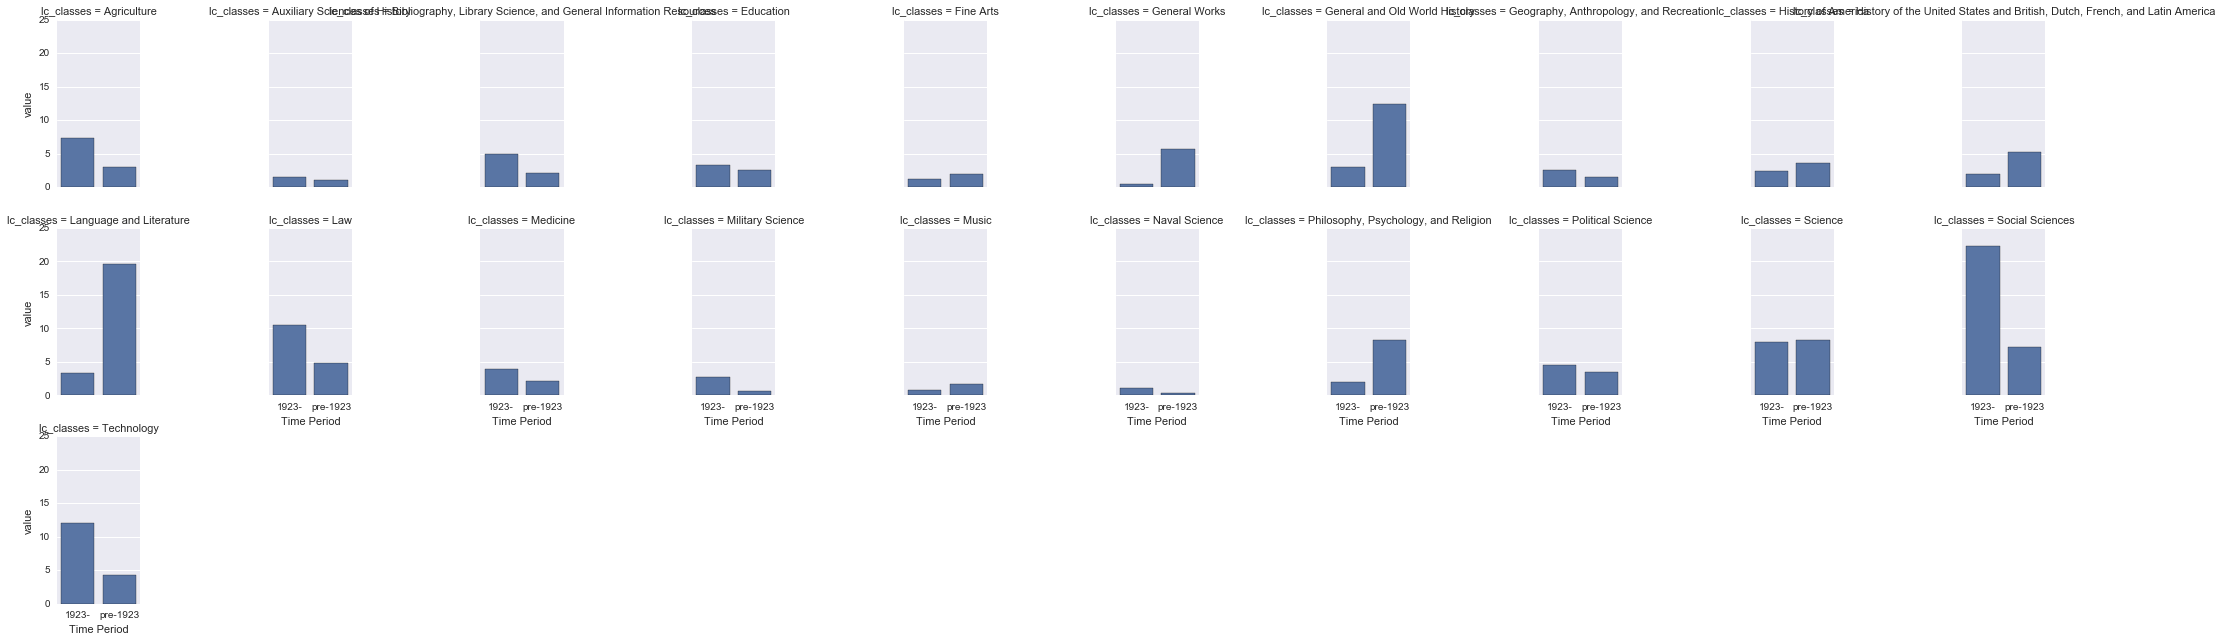

In [44]:
grid = sns.FacetGrid(long_pd, col="lc_classes", col_wrap=10)
grid.map(sns.barplot, "Time Period", "value")

C:\Users\organis2\Dropbox\Work\HTRC\bookworm\BookwormPython\plotSlope.py:170: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  yMark_L.sort(ascending=False)
C:\Users\organis2\Dropbox\Work\HTRC\bookworm\BookwormPython\plotSlope.py:171: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  yMark_R.sort(ascending=False)
C:\Users\organis2\Dropbox\Work\HTRC\bookworm\BookwormPython\plotSlope.py:178: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  yPos_L.sort(cols[i], inplace=True)
C:\Users\organis2\Dropbox\Work\HTRC\bookworm\BookwormPython\plotSlope.py:179: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  yPos_R.sort(cols[i + 1], inplace=True)


ValueError: could not convert string to float: '1923-'

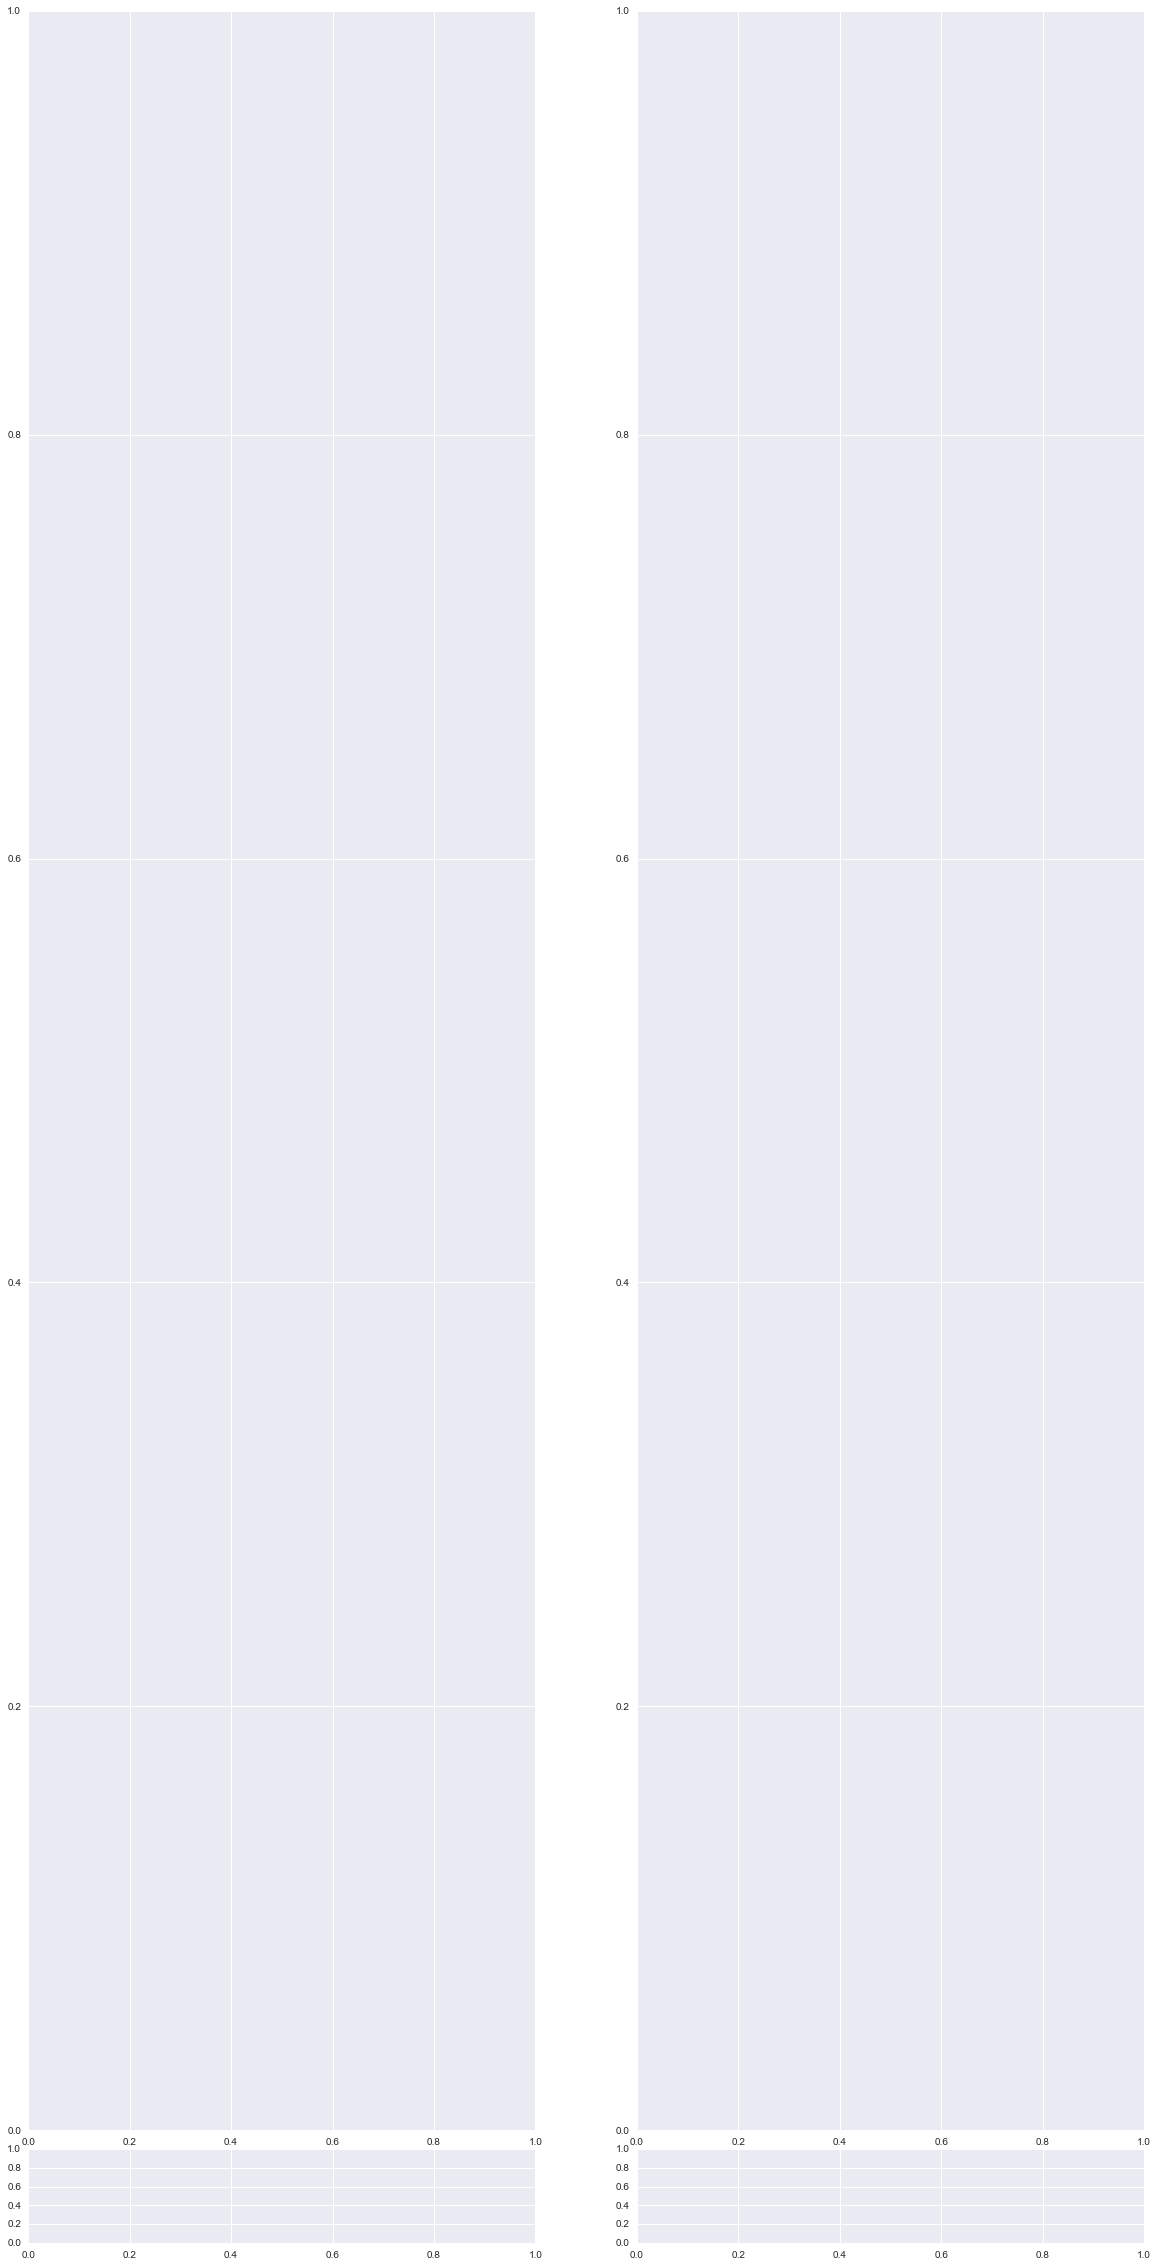

In [45]:
# Draw slopegraph
slope(e, kind='ordinal', height=40, width=20, marker='%0.0f', font_size=20)

C:\Users\organis2\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


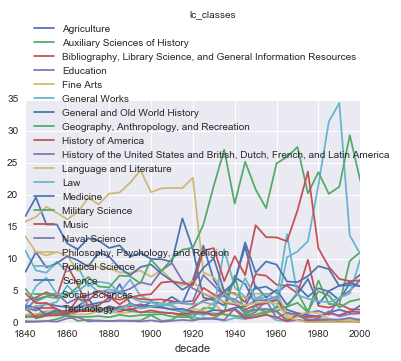

In [37]:
# Look at Class proportions by decade, leading to 1923
a.sort("TextCount", ascending=False).head()
decades = a.reset_index()
# Trim to 1860-1922, inclusive
decades = decades[(1840 <= decades['date_year']) & (decades['date_year'] <= 2000)]
# Remove unknowns
decades = decades[decades.lc_classes != "unknown"]
# Sum up by decade
decades['decade'] = (decades['date_year'] - (decades['date_year'] % 5))
decades = decades[["lc_classes", "decade", "TextCount"]].groupby(["decade", "lc_classes"]).sum().reset_index()
# Pivot from long to wide format
decades = decades.pivot(index="lc_classes", columns="decade", values="TextCount")
# Convert to proportion
decades = 100* decades / decades.apply(lambda x: x.sum())
decades.transpose().plot()

In [50]:
decades.head(2)

decade,1840.0,1845.0,1850.0,1855.0,1860.0,1865.0,1870.0,1875.0,1880.0,1885.0,...,1955.0,1960.0,1965.0,1970.0,1975.0,1980.0,1985.0,1990.0,1995.0,2000.0
lc_classes,,,,,,,,,,,,,,,,,,,,,
Agriculture,2.38%,1.92%,3.07%,2.65%,2.46%,2.44%,2.81%,3.15%,3.39%,6.06%,...,5.68%,4.64%,6.02%,5.73%,4.09%,5.42%,4.89%,3.55%,6.23%,7.55%
Auxiliary Sciences of History,2.34%,0.68%,1.12%,1.28%,1.11%,0.92%,0.94%,1.05%,0.87%,1.25%,...,2.14%,1.63%,0.58%,0.40%,0.27%,0.44%,0.40%,0.35%,0.38%,0.24%


In [51]:
long_decades = pd.melt(decades.reset_index(), id_vars="lc_classes", value_name="Percent of Collection")
long_decades.head()

,lc_classes,decade,Percent of Collection
0,Agriculture,"1,840.00%",2.38%
1,Auxiliary Sciences of History,"1,840.00%",2.34%
2,"Bibliography, Library Science, and General Inf...","1,840.00%",1.03%
3,Education,"1,840.00%",1.14%
4,Fine Arts,"1,840.00%",1.28%


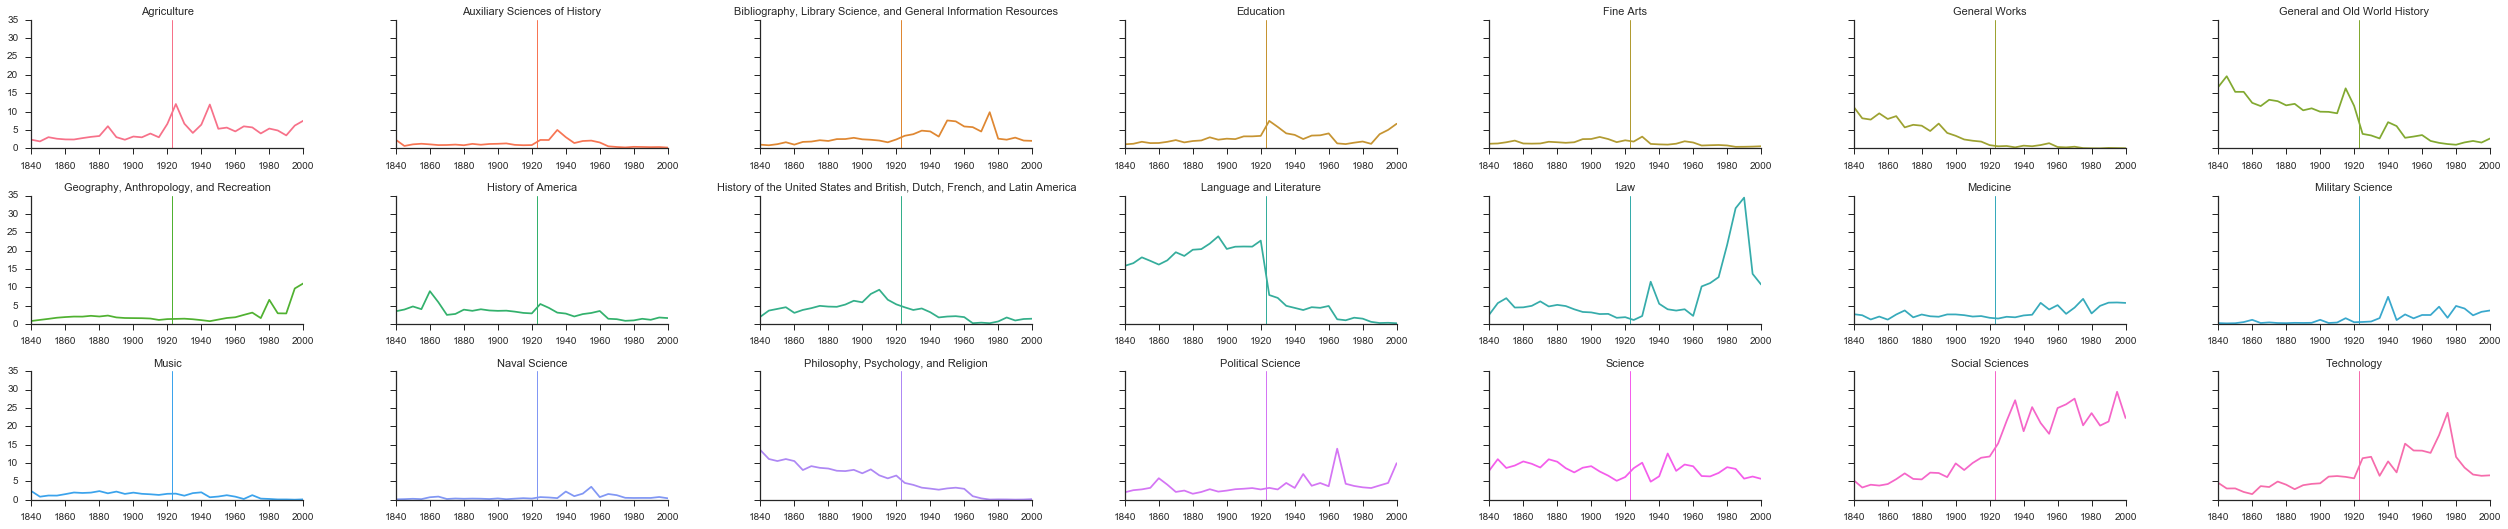

In [63]:
sns.set(style="ticks")
def add_pd_line(**kwargs):
    # Ignoring the kwargs that are sent over
    plt.axvline(1923, linewidth=1, **kwargs)
grid = sns.FacetGrid(long_decades, col="lc_classes", hue="lc_classes", 
                     col_wrap=7, sharex=False, aspect=2, size=2.5)
grid.map(plt.plot, "decade", "Percent of Collection")
grid.map(add_pd_line)
grid.set_titles("{col_name}")
plt.savefig("pd-trends.png", dpi=300)

ValueError: left cannot be >= right

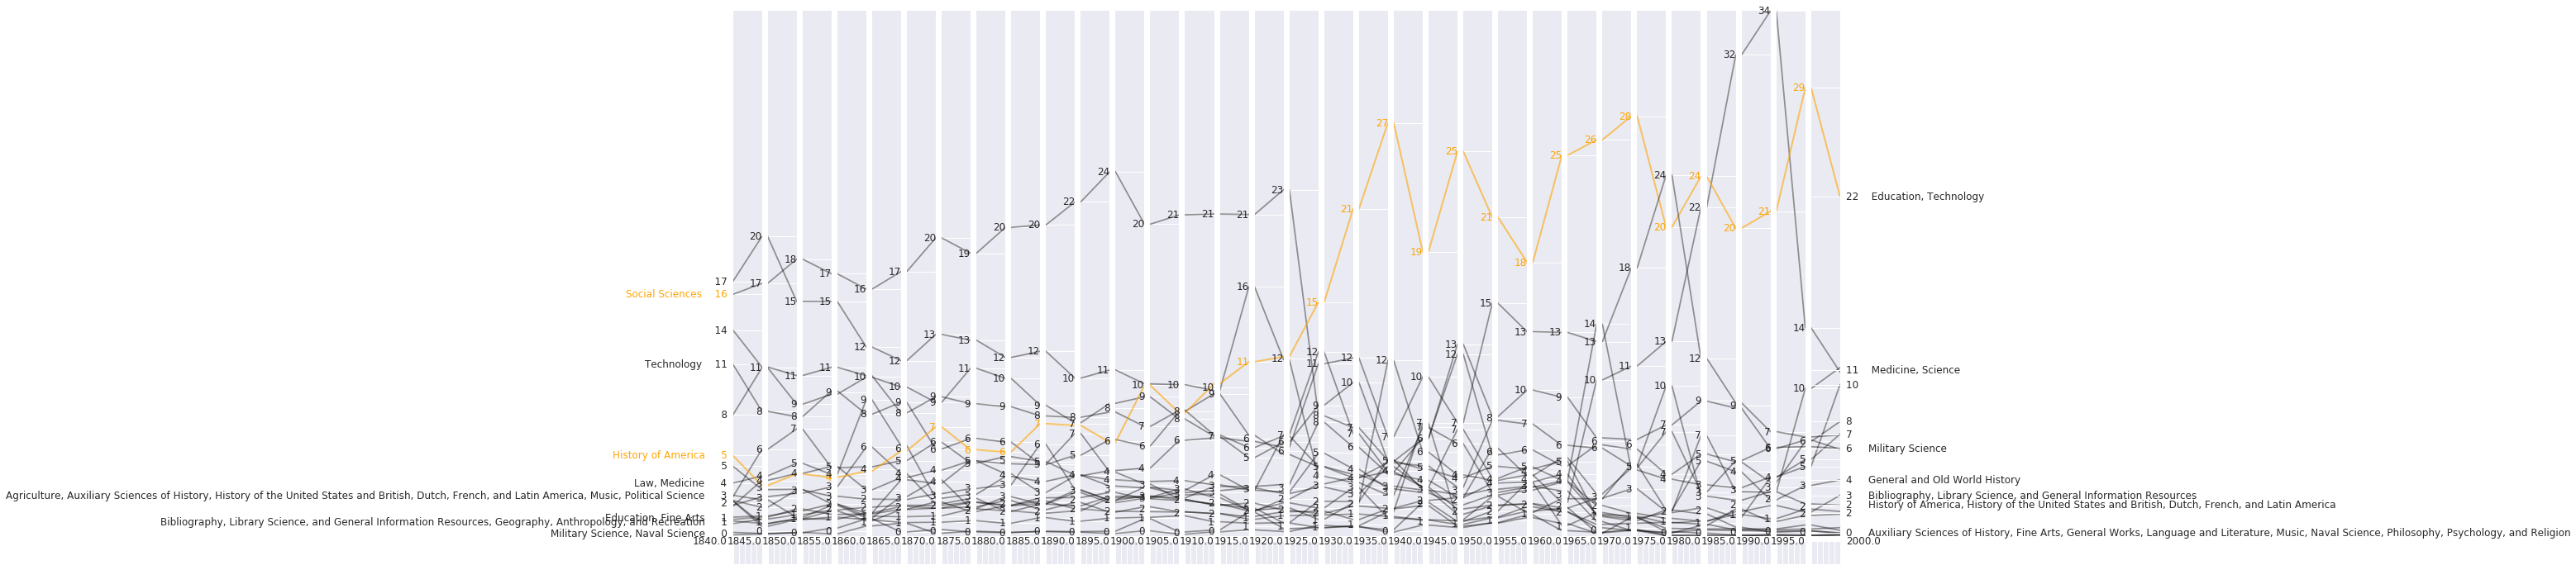

In [48]:
slope(decades,width =24,height= 12,kind='interval', marker="%1.f", color={"Social Sciences":"orange", "Languages and Literature": "blue"},
          font_size=12, dpi=100)
#d.columns = ["pre-1923", "1923-"]

In [69]:
# Plot language
q = bw.default.copy()
q['search_limits'] = [{"date_year":{"$gte":0}}]
q['groups'] = ["languages"]
q['counttype'] = ['TextCount']
a = bw.search(q).sort_values("TextCount", ascending=False)
a

https://bookworm.htrc.illinois.edu/cgi-bin/dbbindings.py?queryTerms={"groups": ["languages"], "compare_limits": [], "counttype": ["TextCount"], "database": "hathipd", "words_collation": "Case_Sensitive", "search_limits": [{"date_year": {"$gte": 0}}], "method": "return_json"}


C:\Users\organis2\AppData\Local\Continuum\Anaconda3\lib\site-packages\requests\packages\urllib3\connectionpool.py:821: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.org/en/latest/security.html
  InsecureRequestWarning)
C:\Users\organis2\Dropbox\Work\HTRC\bookworm\BookwormPython\bwypy\bwypy.py:70: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  df = df.convert_objects(convert_numeric=True)


,TextCount
languages,
English,2747627
German,571677
French,534525
Spanish,144372
Italian,126798
Latin,114683
Japanese,73873
Russian,60082
Dutch,44493


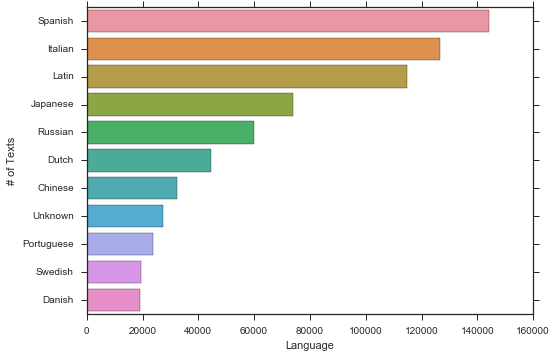

In [100]:
lang_ax = sns.barplot(data=a[3:14].reset_index(), x="TextCount", y="languages")
lang_ax.set(xlabel='Language', ylabel='# of Texts')
plt.savefig("langs-zoom.png")

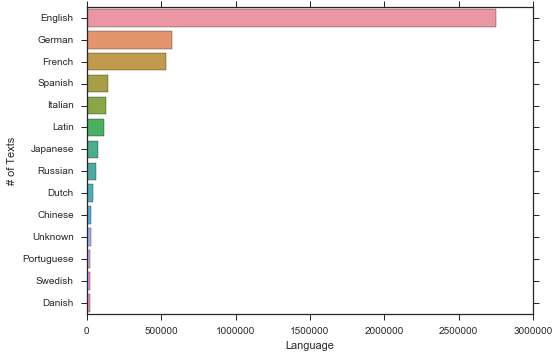

In [103]:
lang_ax = sns.barplot(data=a[:14].reset_index(), x="TextCount", y="languages")
lang_ax.set(xlabel='Language', ylabel='# of Texts')
plt.savefig("langs.png")